In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

%matplotlib notebook

pd.options.display.max_columns = 50

### Описание задания
Вычисление: 
1) среднего
2) максимального
3) минимального
4) медианы, 
5) моды числовых значений 
как для всего массива в целом, так и для каждого типа контента (столбец Type) в отдельности. Найти самый популярный объект в выборке, объяснить почему.

In [2]:
ds = pd.read_csv('./dataset_Facebook.csv', delimiter = ';')

In [12]:
ds.head(5)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,393


We can get rid of 'comment', 'like' and 'share' because 'Total Interactions' is the sum of it and I guess it doesnt influeced very much

In [4]:
ds.drop(['comment', 'like', 'share'], axis=1, inplace=True)

In [5]:
ds.Type.unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

Okay, 4 different types.

As I understand first 7 features are prior to post publication and can be used if u want to predict some post impact, which is represened all next features, so if we want to estimate our products we should pay more attention to these attributes.
All of them represent some information which can be got from Facebook and show how many people have seen your post, clicked on it, who saw it because of likes etc.
More info here http://www.math-evry.cnrs.fr/_media/members/aguilloux/enseignements/m1mint/moro2016.pdf

Lets check our dataset for nulls. It's said in description that there are no nulls, but...

In [6]:
print("Number of Nulls - {}.".format(ds.isnull().sum().sum()))

Number of Nulls - 1.


In [7]:
ds.dropna(inplace=True)

In [8]:
print("Number of Nulls - {}.".format(ds.isnull().sum().sum()))

Number of Nulls - 0.


Lets take our typed data into separate arrays to work with them later

In [9]:
ds_photo = ds.loc[ds['Type'] == 'Photo']
ds_video = ds.loc[ds['Type'] == 'Video']
ds_status = ds.loc[ds['Type'] == 'Status']
ds_link = ds.loc[ds['Type'] == 'Link']

Little function which help us, if we want to look at distributions and main statistical values of all features for all data or for our typed data

In [34]:
def hist_and_some_statistical_measures(ds):
    for i in range(3, 4): #ds.shape[1]):# i decided to show one as example because of large weight of plot
        fig, ax = plt.subplots(1, 1, figsize=(10, 10), constrained_layout=True)
        ax.set_title(list(ds)[i])
        anchored_text = AnchoredText("mean = %.4f\n"
                                 "std  = %.4f\n"
                                 "max  = %.4f\n"
                                 "min  = %.4f\n"
                                 "median  = %.4f"
                                 % (ds.iloc[::, i].mean(), ds.iloc[::, i].std(), ds.iloc[::, i].max(), 
                                    ds.iloc[::, i].min(), ds.iloc[:, i].median()), loc='upper right')
        ax.add_artist(anchored_text)
        ax = sns.distplot(ds.values[::, i].astype(str).astype(float))

<IPython.core.display.Javascript object>


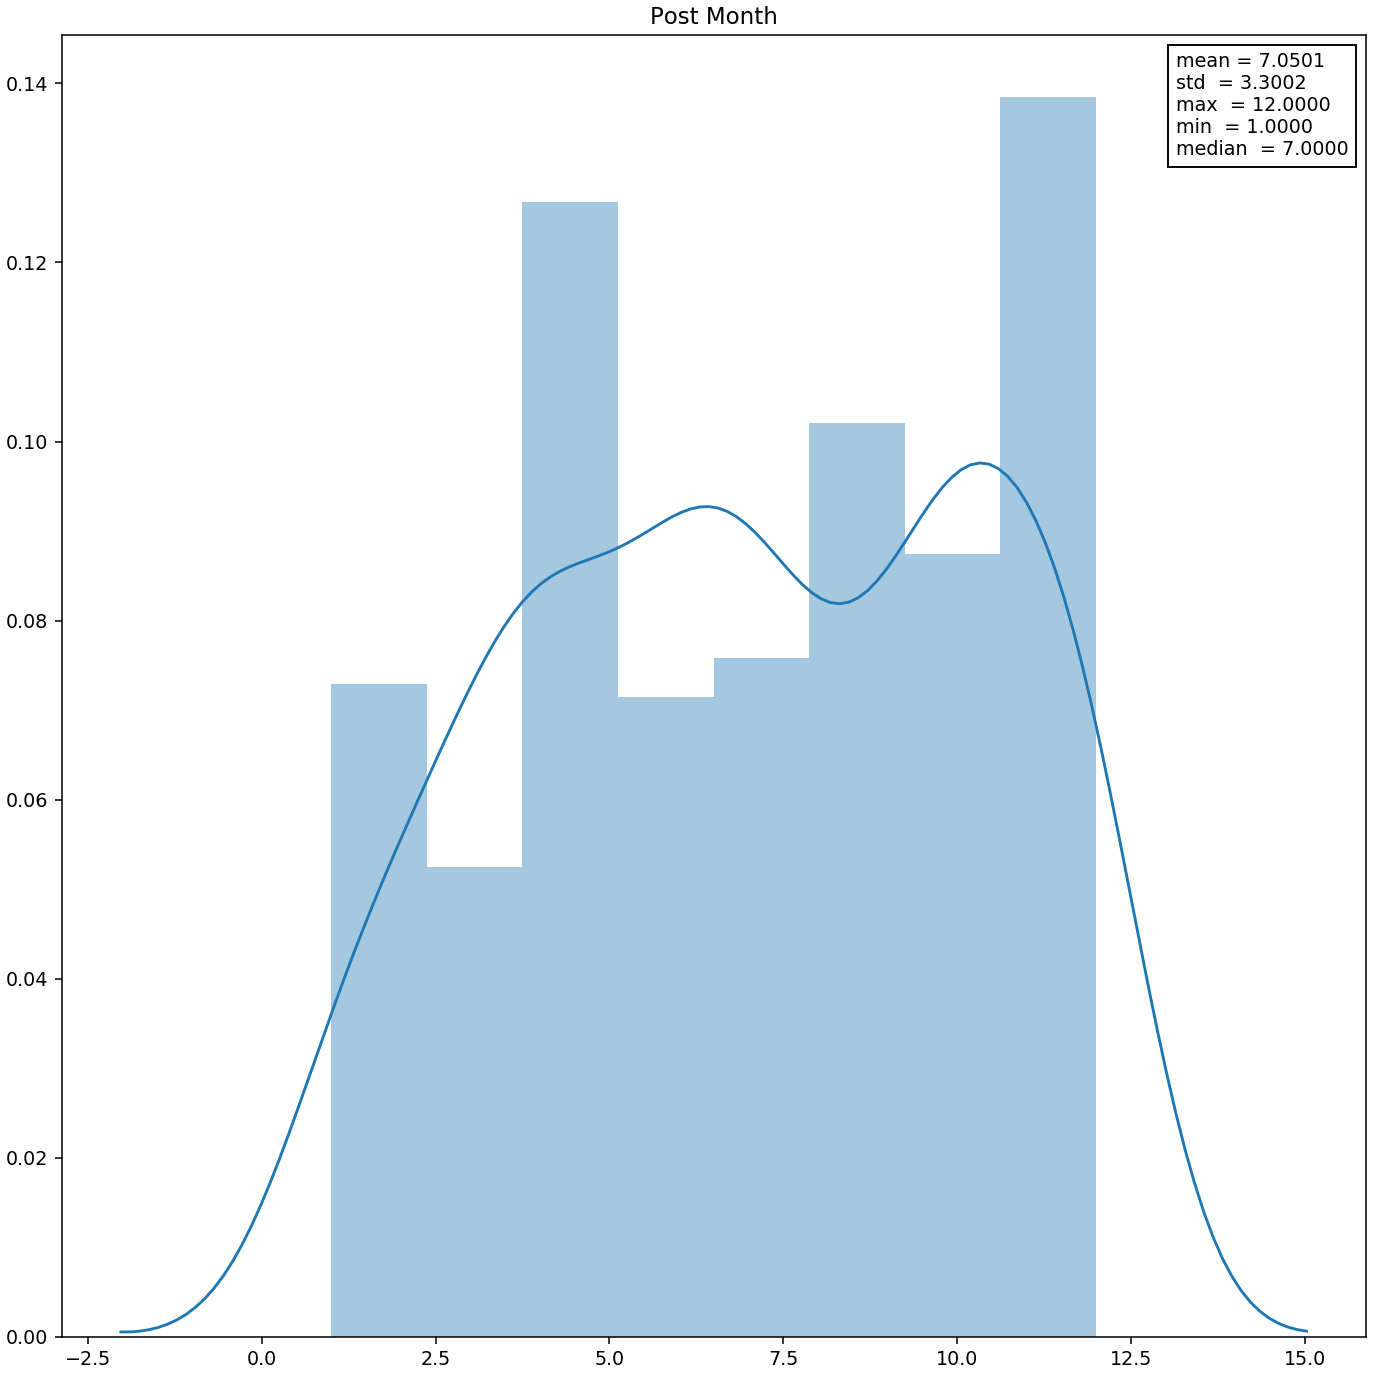

D:\Programms\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


In [32]:
hist_and_some_statistical_measures(ds)

Here I added comparison of all typed data, but I dont think that it is representative enough and it's better just to look at values below

In [1]:
#for i in range(3, ds.shape[1]):
#    fig, ax = plt.subplots(1, 1, figsize=(10, 10), constrained_layout=True)
#    ax.set_title(list(ds)[i])
#    ax = sns.distplot(ds_photo.values[::, i].astype(str).astype(float), rug=True, hist=False, label='Photo')
#    ax = sns.distplot(ds_video.values[::, i].astype(str).astype(float), rug=True, hist=False, label='Video')
#    ax = sns.distplot(ds_status.values[::, i].astype(str).astype(float), rug=True, hist=False, label='Status')
#    ax = sns.distplot(ds_link.values[::, i].astype(str).astype(float), rug=True, hist=False, label='Link')
#    ax.legend()

### Mean value

In [15]:
for i in range(3, ds.shape[1]):
    print(list(ds)[i])
    print(                       "All = %.4f\t"
                                 "Photo  = %.4f\t"
                                 "Video  = %.4f\t"
                                 "Link  = %.4f\t"
                                 "Status  = %.4f\t" % 
     (ds.iloc[::, i].mean(), ds_photo.iloc[::, i].mean(), ds_video.iloc[::, i].mean(), ds_status.iloc[::, i].mean(), ds_link.iloc[::, i].mean()))

Post Month
All = 7.0501	Photo  = 6.8188	Video  = 9.5714	Link  = 9.0667	Status  = 6.5909	
Post Weekday
All = 4.1503	Photo  = 4.1082	Video  = 3.5714	Link  = 4.5778	Status  = 4.2727	
Post Hour
All = 7.8477	Photo  = 8.0071	Video  = 8.7143	Link  = 7.2444	Status  = 5.7273	
Paid
All = 0.2786	Photo  = 0.2800	Video  = 0.5714	Link  = 0.2222	Status  = 0.2727	
Lifetime Post Total Reach
All = 13922.8297	Photo  = 13158.8729	Video  = 51205.7143	Link  = 13078.8889	Status  = 18544.5909	
Lifetime Post Total Impressions
All = 29630.6253	Photo  = 29045.5624	Video  = 102622.4286	Link  = 24244.4667	Status  = 28725.4545	
Lifetime Engaged Users
All = 921.0581	Photo  = 819.5459	Video  = 1707.0000	Link  = 2040.2222	Status  = 342.8182	
Lifetime Post Consumers
All = 799.3226	Photo  = 690.8235	Video  = 1584.7143	Link  = 1949.5556	Status  = 292.6818	
Lifetime Post Consumptions
All = 1416.4770	Photo  = 1300.3341	Video  = 2600.1429	Link  = 2838.8667	Status  = 374.0909	
Lifetime Post Impressions by people who have lik

### Std

In [16]:
for i in range(3, ds.shape[1]):
    print(list(ds)[i])
    print(                       "All = %.4f\t"
                                 "Photo  = %.4f\t"
                                 "Video  = %.4f\t"
                                 "Link  = %.4f\t"
                                 "Status  = %.4f\t" % 
     (ds.iloc[::, i].std(), ds_photo.iloc[::, i].std(), ds_video.iloc[::, i].std(), ds_status.iloc[::, i].std(), ds_link.iloc[::, i].std()))

Post Month
All = 3.3002	Photo  = 3.2262	Video  = 2.2991	Link  = 2.5531	Status  = 4.5634	
Post Weekday
All = 2.0327	Photo  = 2.0587	Video  = 1.5119	Link  = 1.9246	Status  = 1.8563	
Post Hour
All = 4.3696	Photo  = 4.4140	Video  = 4.3480	Link  = 3.9263	Status  = 3.9301	
Paid
All = 0.4487	Photo  = 0.4495	Video  = 0.5345	Link  = 0.4204	Status  = 0.4558	
Lifetime Post Total Reach
All = 22759.4367	Photo  = 22900.6157	Video  = 48825.1910	Link  = 5218.0864	Status  = 21399.4113	
Lifetime Post Total Impressions
All = 76873.8156	Photo  = 81046.4654	Video  = 101838.3141	Link  = 9929.1429	Status  = 50042.0477	
Lifetime Engaged Users
All = 985.8755	Photo  = 869.3822	Video  = 1174.7861	Link  = 1351.9968	Status  = 340.1744	
Lifetime Post Consumers
All = 883.3046	Photo  = 732.5303	Video  = 1160.7015	Link  = 1319.9804	Status  = 291.3853	
Lifetime Post Consumptions
All = 2002.3748	Photo  = 1968.1280	Video  = 2296.6435	Link  = 2075.4195	Status  = 358.4048	
Lifetime Post Impressions by people who have liked

Bar plot for our types, can be useful and very representative 

<IPython.core.display.Javascript object>


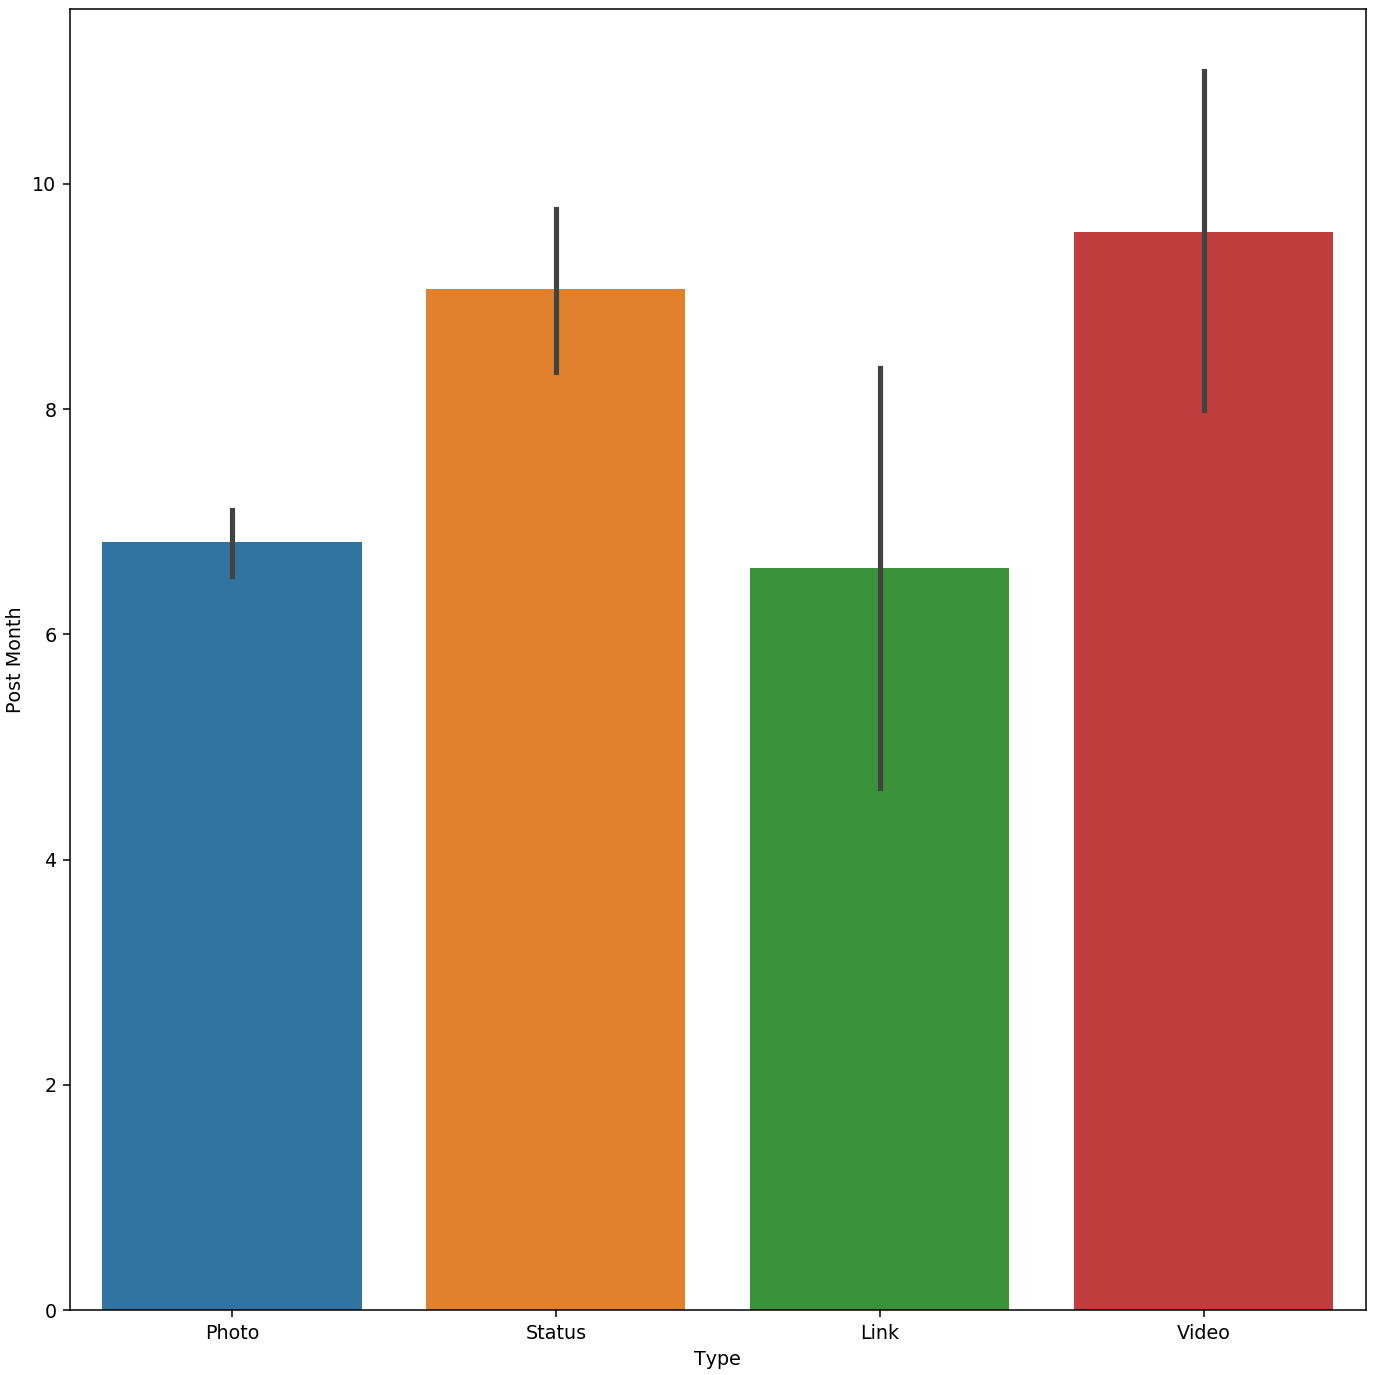

In [33]:
for i in range(3,4): # ds.shape[1]):# i decided to show one as example because of large weight of plot
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), constrained_layout=True)
    ax = sns.barplot(x='Type', y=ds.iloc[::, i], data = ds)

### Max value

In [18]:
for i in range(3, ds.shape[1]):
    print(list(ds)[i])
    print(                       "All = %.4f\t"
                                 "Photo  = %.4f\t"
                                 "Video  = %.4f\t"
                                 "Link  = %.4f\t"
                                 "Status  = %.4f\t" % 
     (ds.iloc[::, i].max(), ds_photo.iloc[::, i].max(), ds_video.iloc[::, i].max(), ds_status.iloc[::, i].max(), ds_link.iloc[::, i].max()))

Post Month
All = 12.0000	Photo  = 12.0000	Video  = 12.0000	Link  = 12.0000	Status  = 12.0000	
Post Weekday
All = 7.0000	Photo  = 7.0000	Video  = 6.0000	Link  = 7.0000	Status  = 7.0000	
Post Hour
All = 23.0000	Photo  = 23.0000	Video  = 13.0000	Link  = 15.0000	Status  = 14.0000	
Paid
All = 1.0000	Photo  = 1.0000	Video  = 1.0000	Link  = 1.0000	Status  = 1.0000	
Lifetime Post Total Reach
All = 180480.0000	Photo  = 180480.0000	Video  = 139008.0000	Link  = 31136.0000	Status  = 70912.0000	
Lifetime Post Total Impressions
All = 1110282.0000	Photo  = 1110282.0000	Video  = 277100.0000	Link  = 59964.0000	Status  = 229733.0000	
Lifetime Engaged Users
All = 11452.0000	Photo  = 11452.0000	Video  = 3872.0000	Link  = 6164.0000	Status  = 1374.0000	
Lifetime Post Consumers
All = 11328.0000	Photo  = 11328.0000	Video  = 3822.0000	Link  = 5934.0000	Status  = 1106.0000	
Lifetime Post Consumptions
All = 19779.0000	Photo  = 19779.0000	Video  = 7327.0000	Link  = 9237.0000	Status  = 1345.0000	
Lifetime Post Imp

### Min value

In [19]:
for i in range(3, ds.shape[1]):
    print(list(ds)[i])
    print(                       "All = %.4f\t"
                                 "Photo  = %.4f\t"
                                 "Video  = %.4f\t"
                                 "Link  = %.4f\t"
                                 "Status  = %.4f\t" % 
     (ds.iloc[::, i].min(), ds_photo.iloc[::, i].min(), ds_video.iloc[::, i].min(), ds_status.iloc[::, i].min(), ds_link.iloc[::, i].min()))

Post Month
All = 1.0000	Photo  = 1.0000	Video  = 6.0000	Link  = 3.0000	Status  = 1.0000	
Post Weekday
All = 1.0000	Photo  = 1.0000	Video  = 2.0000	Link  = 1.0000	Status  = 1.0000	
Post Hour
All = 1.0000	Photo  = 1.0000	Video  = 2.0000	Link  = 2.0000	Status  = 2.0000	
Paid
All = 0.0000	Photo  = 0.0000	Video  = 0.0000	Link  = 0.0000	Status  = 0.0000	
Lifetime Post Total Reach
All = 238.0000	Photo  = 238.0000	Video  = 13544.0000	Link  = 3930.0000	Status  = 1536.0000	
Lifetime Post Total Impressions
All = 570.0000	Photo  = 570.0000	Video  = 30235.0000	Link  = 7509.0000	Status  = 3094.0000	
Lifetime Engaged Users
All = 9.0000	Photo  = 9.0000	Video  = 459.0000	Link  = 128.0000	Status  = 24.0000	
Lifetime Post Consumers
All = 9.0000	Photo  = 9.0000	Video  = 411.0000	Link  = 86.0000	Status  = 23.0000	
Lifetime Post Consumptions
All = 9.0000	Photo  = 9.0000	Video  = 539.0000	Link  = 112.0000	Status  = 26.0000	
Lifetime Post Impressions by people who have liked your Page
All = 567.0000	Photo  = 

### Median

In [20]:
for i in range(3, ds.shape[1]):
    print(list(ds)[i])
    print(                       "All = %.4f\t"
                                 "Photo  = %.4f\t"
                                 "Video  = %.4f\t"
                                 "Link  = %.4f\t"
                                 "Status  = %.4f\t" % 
     (ds.iloc[::, i].median(), ds_photo.iloc[::, i].median(), ds_video.iloc[::, i].median(), ds_status.iloc[::, i].median(), ds_link.iloc[::, i].median()))

Post Month
All = 7.0000	Photo  = 7.0000	Video  = 11.0000	Link  = 10.0000	Status  = 4.5000	
Post Weekday
All = 4.0000	Photo  = 4.0000	Video  = 3.0000	Link  = 5.0000	Status  = 4.5000	
Post Hour
All = 9.0000	Photo  = 9.0000	Video  = 11.0000	Link  = 9.0000	Status  = 4.0000	
Paid
All = 0.0000	Photo  = 0.0000	Video  = 1.0000	Link  = 0.0000	Status  = 0.0000	
Lifetime Post Total Reach
All = 5282.0000	Photo  = 4684.0000	Video  = 30624.0000	Link  = 11096.0000	Status  = 7422.0000	
Lifetime Post Total Impressions
All = 9067.0000	Photo  = 8132.0000	Video  = 56950.0000	Link  = 20849.0000	Status  = 9773.0000	
Lifetime Engaged Users
All = 626.0000	Photo  = 607.0000	Video  = 1779.0000	Link  = 1701.0000	Status  = 244.0000	
Lifetime Post Consumers
All = 554.0000	Photo  = 529.0000	Video  = 1643.0000	Link  = 1599.0000	Status  = 205.0000	
Lifetime Post Consumptions
All = 852.0000	Photo  = 832.0000	Video  = 2331.0000	Link  = 2201.0000	Status  = 290.0000	
Lifetime Post Impressions by people who have liked you

### Mode

It looks like there are several modes for several features, what is logical because thee are not only categorical data, which usually give us only 1 value

In [21]:
ds.mode(axis=0)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Total Interactions
0,136393.0,Photo,1.0,10.0,7.0,3.0,0.0,677.0,4372.0,537.0,182.0,431.0,1210.0,690,403.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2232.0,6503.0,NaN,298.0,513.0,1284.0,704,NaN,39.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2645.0,7004.0,NaN,319.0,599.0,2541.0,1228,NaN,75.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2938.0,8533.0,NaN,322.0,652.0,2888.0,1640,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3322.0,8745.0,NaN,335.0,719.0,3675.0,1674,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3358.0,12735.0,NaN,374.0,730.0,4911.0,1722,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3414.0,NaN,NaN,482.0,795.0,4935.0,2044,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3528.0,NaN,NaN,503.0,889.0,5010.0,2124,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3754.0,NaN,NaN,513.0,NaN,5732.0,2162,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5280.0,NaN,NaN,642.0,NaN,NaN,2174,NaN,NaN


### The most popular object

To find the most popular object we should understand, what does it mean 'the most popular'
We can assume that this object should have the best values of all features, but for me it's not so easy to understand which attribute is more important for popularity of our objects. We can empirically biult some function which will calculate popularity of every object and just find the most popular, but I will try to estimate on myself according to our statistical values

In [22]:
ds_pop = ds.iloc[::, 7:ds.shape[1]]

In [23]:
ds_pop

,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Total Interactions
0,2752,5091,178,109,159,3078,1640,119,100
1,10460,19057,1457,1361,1674,11710,6112,1108,164
2,2413,4373,177,113,154,2812,1503,132,80
3,50128,87991,2211,790,1119,61027,32048,1386,1777
4,7244,13594,671,410,580,6228,3200,396,393
5,10472,20849,1191,1073,1389,16034,7852,1016,186
6,11692,19479,481,265,364,15432,9328,379,279
7,13720,24137,537,232,305,19728,11056,422,339
8,11844,22538,1530,1407,1692,15220,7912,1250,192
9,4694,8668,280,183,250,4309,2324,199,142


Lets find all objects, whichs values of features are above the mean values

In [24]:
ds_pop=ds_pop.loc[(ds['Lifetime Post Total Reach'] > ds['Lifetime Post Total Reach'].mean()) &
           (ds['Lifetime Engaged Users'] > ds['Lifetime Engaged Users'].mean()) &
           (ds['Lifetime Post Consumers'] > ds['Lifetime Post Consumers'].mean()) &
           (ds['Lifetime Post Consumptions'] > ds['Lifetime Post Consumptions'].mean()) &
           (ds['Lifetime Post Impressions by people who have liked your Page'] > ds['Lifetime Post Impressions by people who have liked your Page'].mean()) &
           (ds['Lifetime Post reach by people who like your Page'] > ds['Lifetime Post reach by people who like your Page'].mean()) &
           (ds['Lifetime People who have liked your Page and engaged with your post'] > ds['Lifetime People who have liked your Page and engaged with your post'].mean()) &
           (ds['Total Interactions'] > ds['Total Interactions'].mean()) &
       (ds['Lifetime Post Total Impressions'] > ds['Lifetime Post Total Impressions'].mean())]

In [25]:
ds_pop

,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Total Interactions
10,21744,42334,4258,4100,4540,37849,18952,3798,252
17,53264,111785,1706,1103,1655,92512,39776,1307,713
26,19552,34143,2806,2531,3420,17748,9824,1779,494
38,17576,33058,5352,5202,6547,23135,11792,4104,269
46,16576,30612,3572,3464,4802,24363,12888,3014,214
67,53456,93790,1576,995,1469,32646,14912,884,787
71,100768,220447,2101,1735,2331,59658,18880,885,550
101,68896,104952,2624,1326,1952,35707,19840,1354,1626
105,70144,111745,3216,2628,4782,43671,20608,1542,1136
116,32208,57472,1810,1490,2286,56149,31648,1724,458


And just choose the one, which has the highest mean value 

In [26]:
ds_pop.mean(axis = 1).sort_values(ascending=False)

415    258175.222222
460    159718.666667
464     80391.888889
244     76421.666667
277     63265.222222
442     49712.555556
71      45261.666667
449     42682.333333
379     38132.777778
206     34268.777778
17      33757.888889
349     33043.888889
323     31861.888889
105     28830.222222
150     28258.333333
271     27056.888889
101     26475.222222
272     25935.888889
302     24542.888889
254     23157.888889
346     22902.777778
67      22279.444444
194     21732.333333
116     20582.777778
401     20168.444444
199     20045.777778
168     19996.444444
142     19093.888889
270     18478.666667
391     18275.111111
370     18042.888889
315     17732.333333
364     17158.000000
328     17020.888889
183     16054.222222
10      15314.111111
172     15139.444444
352     14806.111111
243     13057.777778
223     12548.777778
38      11892.777778
176     11395.666667
371     11094.888889
242     11069.555556
46      11056.111111
468     10528.333333
121     10343.888889
26      10255

In [28]:
ds.iloc[415,::]

Page total likes                                                        104070
Type                                                                     Photo
Category                                                                     1
Post Month                                                                   3
Post Weekday                                                                 4
Post Hour                                                                    7
Paid                                                                         0
Lifetime Post Total Reach                                                49632
Lifetime Post Total Impressions                                        1110282
Lifetime Engaged Users                                                    1653
Lifetime Post Consumers                                                   1480
Lifetime Post Consumptions                                                2567
Lifetime Post Impressions by people who have liked y

So at the result we have object № 415.